Decision Tree Accuracy: 0.95


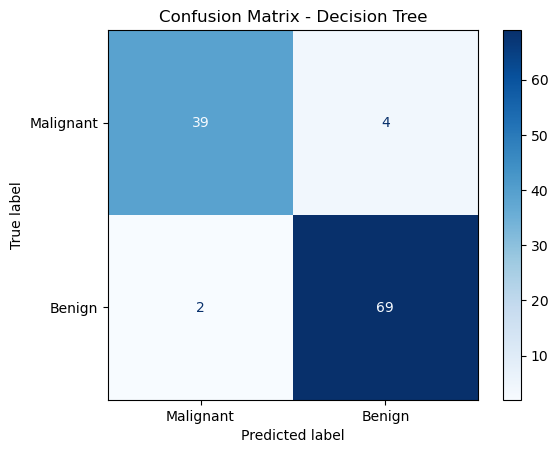

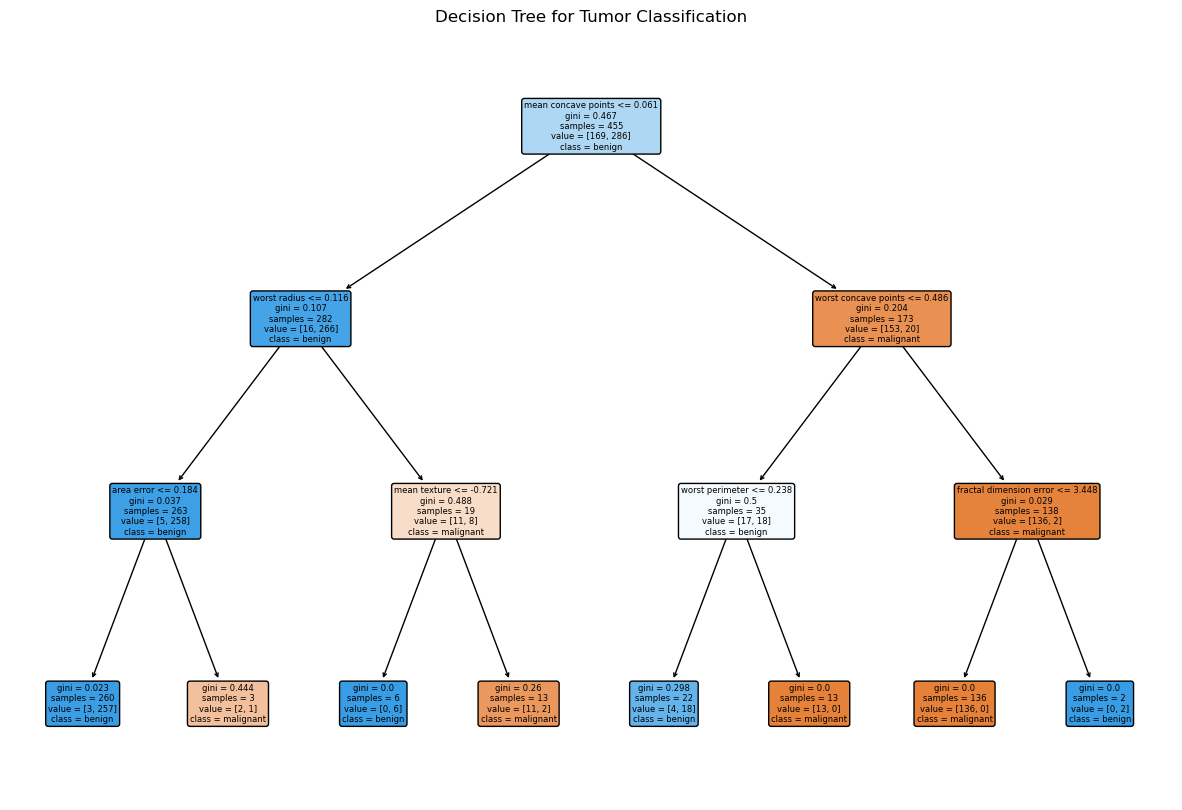

Decision Tree Prediction: Benign


In [3]:
# File: breast_cancer_decision_tree.py

# Import libraries
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
def load_and_preprocess_data():
    """
    Load and preprocess the breast cancer dataset.
    - Scales the data using StandardScaler.
    - Splits the dataset into training and test sets.
    """
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name="Malignant")
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, data

# Train Decision Tree model
def train_decision_tree(X_train, y_train):
    """
    Train a Decision Tree model.
    """
    tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    tree_model.fit(X_train, y_train)
    return tree_model

# Preprocess a new image
def preprocess_image(image_path, target_size=(1, 30)):
    """
    Preprocess an image to match the model's input format.
    - Resizes the image to match the number of features the model expects.
    - Standardizes the pixel values.
    """
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_resized = img.resize(target_size)  # Resize to target dimensions
    img_array = np.array(img_resized).flatten()  # Flatten the image to a 1D array
    img_array = (img_array - np.mean(img_array)) / np.std(img_array)  # Standardize
    return img_array.reshape(1, -1)

# Predict and display results
def predict_and_display(tree_model, image_features):
    """
    Predict the class of the given image using the Decision Tree model and display the result.
    """
    # Mapping numeric predictions to labels
    label_mapping = {0: "Malignant", 1: "Benign"}
    
    # Prediction
    prediction = tree_model.predict(image_features)
    predicted_label = label_mapping[prediction[0]]
    
    # Display prediction
    print(f"Decision Tree Prediction: {predicted_label}")

# Main script execution
if __name__ == "__main__":
    # Load and preprocess dataset
    X_train, X_test, y_train, y_test, data = load_and_preprocess_data()

    # Train the Decision Tree model
    tree_model = train_decision_tree(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = tree_model.predict(X_test)
    tree_accuracy = accuracy_score(y_test, y_pred)
    print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

    # Visualize the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benign"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix - Decision Tree")
    plt.show()

    # Visualize the decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(
        tree_model,
        feature_names=data.feature_names.tolist(),  # Ensure feature names are a list
        class_names=["malignant", "benign"],        # Manually map class names
        filled=True,
        rounded=True
    )
    plt.title("Decision Tree for Tumor Classification")
    plt.show()

    # Test a new image
    image_path = "C:/Users/Malco\Desktop/Screenshot 2025-01-10 214546.png"  # Replace with your image path
    image_features = preprocess_image(image_path, target_size=(1, 30))
    
    # Predict and display the result
    predict_and_display(tree_model, image_features)
